## Load in Dataset

In [1]:
%load_ext autoreload
%autoreload 2
from spookyauthor.data import make_dataset
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train,test = make_dataset.load_raw_data()

In [3]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


Check sizes of test and train dataset

In [5]:
train.shape

(19579, 3)

In [6]:
test.shape

(8392, 2)

Get longest string by string by word count in the train set

In [7]:
train['text'].apply(lambda x: len(x.split(" "))).describe()

count    19579.000000
mean        26.730477
std         19.048353
min          2.000000
25%         15.000000
50%         23.000000
75%         34.000000
max        861.000000
Name: text, dtype: float64

See which author is most common

In [8]:
train["author"].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

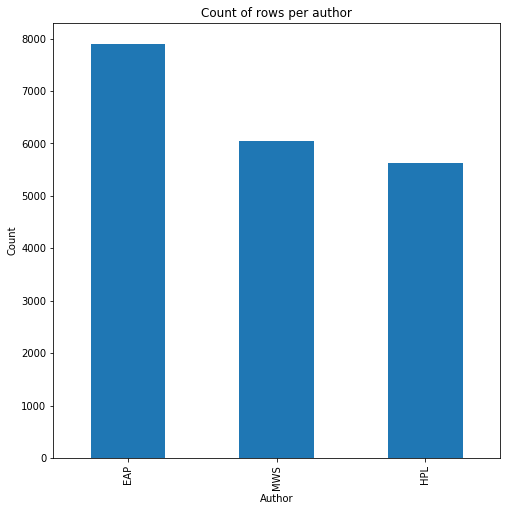

In [9]:
ax = train["author"].value_counts().plot(kind='bar', title="Count of rows per author", figsize = (8,8))
ax.set_xlabel("Author")
ax.set_ylabel("Count")

# Initial Predictions
Train a dummy classifier and see how well it performs on the given training data and Kaggle benchmark for reference

In [10]:
# Prepare Training Data
from spookyauthor.data import make_dataset
train_id, x_train, y_true = make_dataset.Preprocessing.split_cols(train)

In [11]:
from sklearn.dummy import DummyClassifier
import numpy as np
clf = DummyClassifier(strategy='most_frequent')
fake_x = np.zeros(len(train_y)).reshape(-1,1)

clf.fit(X=fake_x, y=y_true)

NameError: name 'train_y' is not defined

In [ ]:
y_pred = clf.predict_proba(X=fake_x)

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_true, y_pred, labels=clf.classes_)

## Predict Original Labels for comparison
In this case because it's exactly the same the log loss should be nearly zero

In [ ]:
import pandas as pd
y_pred=pd.get_dummies(y_true)

In [ ]:
log_loss(y_true, y_pred, labels=clf.classes_)

## Use dummy classifier to predict labels for test data and see where that puts me on the leaderboard

In [ ]:
from spookyauthor.models import pipeline
dummy_clf = pipeline.dummypipeline.fit(x_train, y_true)
predict_model.submission_generator(test, dummy_clf, "DummyOutputs.csv")

## Find Most Common Words

In [14]:
words = []
for index, text in train['text'].iteritems():
    for word in text.split(" "):
        words.append(word)
        
words_s = pd.Series(words)

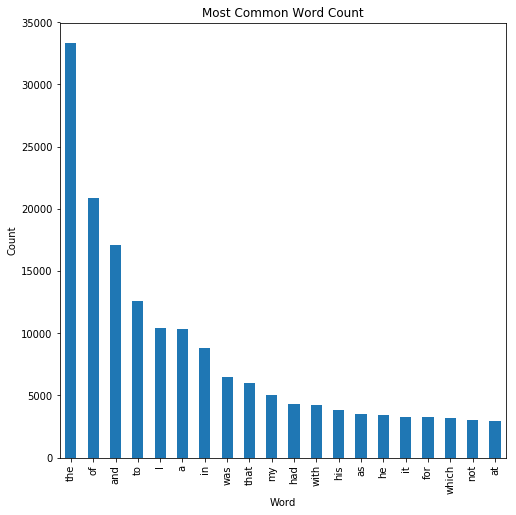

In [19]:
ax = words_s.value_counts()[:20].plot(kind='bar', title="Most Common Word Count", figsize = (8,8))
ax.set_xlabel("Word")
ax.set_ylabel("Count")